In [1]:
import pandas as pd
from sklift.viz import plot_qini_curve, plot_uplift_curve
from sklift.metrics import qini_auc_score, uplift_auc_score
import matplotlib.pyplot as plt
from nb21 import elast, cumulative_gain

In [2]:
def eval(model_name, model_filename, general_model, data):
    treatment_column = 'peep_regime'
    outcome_column = 'survival'
    cate_column = 'cate'

    qini_auc_test = qini_auc_score(data[outcome_column], data[cate_column], data[treatment_column])

    uplift_auc_test = uplift_auc_score(data[outcome_column], data[cate_column], data[treatment_column])

    results = {f'RCT - {model_filename}': [{'qini_auc': qini_auc_test, 'uplift_auc': uplift_auc_test}]}

    # Visualize Qini Curve - RCT
    fig, ax = plt.subplots(1, 1)
    ax.set_title(f'Qini curve - RCT - {model_name}')
    plot_qini_curve(data[outcome_column], data[cate_column], data[treatment_column], perfect=False, name='DR-Learner', ax=ax)
    plt.title(f"Qini curve - RCT - {model_name}")
    plt.legend(loc='best')
    plt.savefig(f'plots/RCT/{model_filename}-Qini_curve_test.png', bbox_inches='tight')
    plt.savefig(f'plots/RCT/{model_filename}-Qini_curve_test.svg', bbox_inches='tight')
    plt.show()

    # Visualize Uplift Curve - RCT
    fig, ax = plt.subplots(1, 1)
    ax.set_title(f'Uplift curve - RCT - {model_name}')
    plot_uplift_curve(data[outcome_column], data[cate_column], data[treatment_column], perfect=False, name=general_model, ax=ax)
    plt.title(f"Uplift curve - RCT - {model_name}")
    plt.legend(loc='best')
    plt.savefig(f'plots/RCT/{model_filename}-Uplift_curve_test.png', bbox_inches='tight')
    plt.savefig(f'plots/RCT/{model_filename}-Uplift_curve_test.svg', bbox_inches='tight')
    plt.show()
        
    cate = data[cate_column]

    gain_curve = cumulative_gain(data.assign(cate=cate), "cate", y=outcome_column, t=treatment_column)

    # plt.figure(dpi=200)
    plt.plot(gain_curve, color="C8", label=general_model)

    plt.plot([0, 100], [0, elast(data, outcome_column, treatment_column)], linestyle="--", color="black", label="Baseline")
    plt.legend(loc='best')
    plt.title(f"Cumulative gain - RCT - {model_name}")
    plt.savefig(f'plots/RCT/{model_filename}-Cumulative_gain_curve_train.png', bbox_inches='tight')
    plt.savefig(f'plots/RCT/{model_filename}-Cumulative_gain_curve_train.svg', bbox_inches='tight')
    plt.show()
    return results


all_results = {'RCT results': []}

# S-Learner with Gradient Boosting


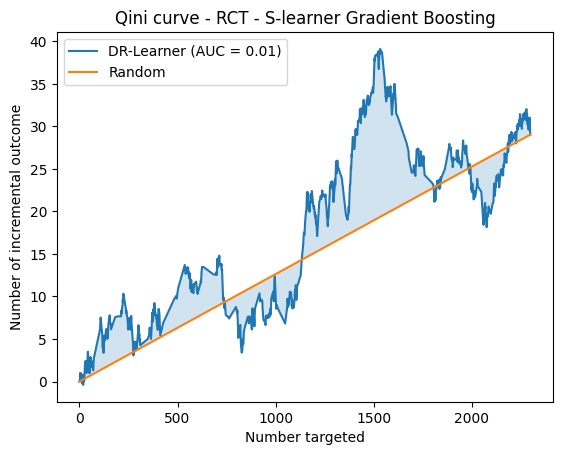

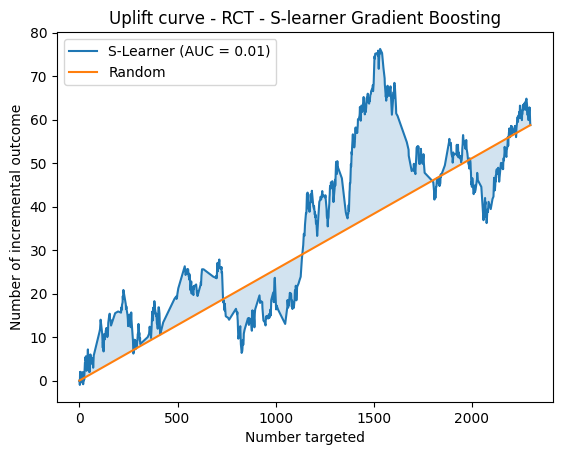

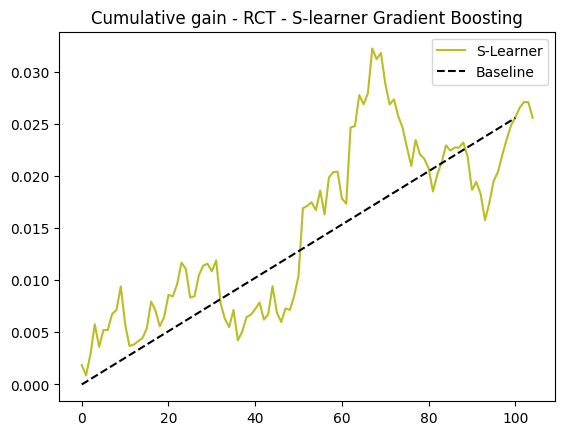

{'RCT - s_learner_gb': [{'qini_auc': 0.005332116699522888, 'uplift_auc': 0.007316204411225892}]}


In [99]:

data = pd.read_csv('../data/rct/s_learner_gb_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'S-Learner'
model_name = 'S-learner Gradient Boosting'
model_filename = 's_learner_gb'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# S-Learner with Linear Regression


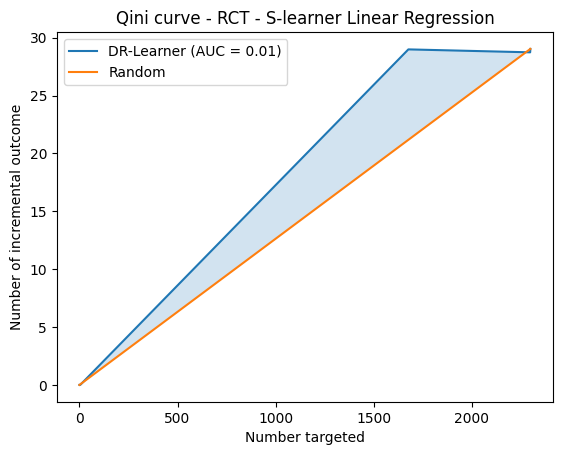

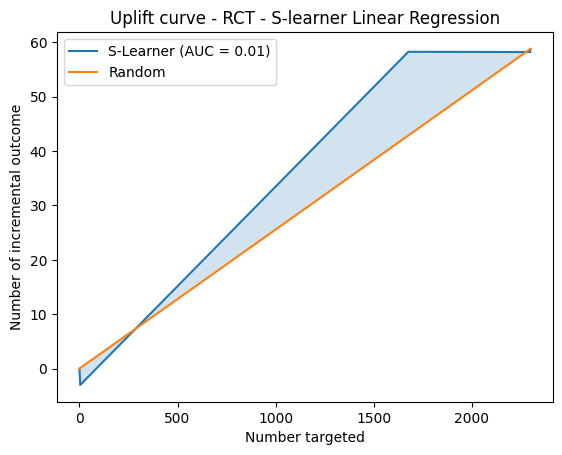

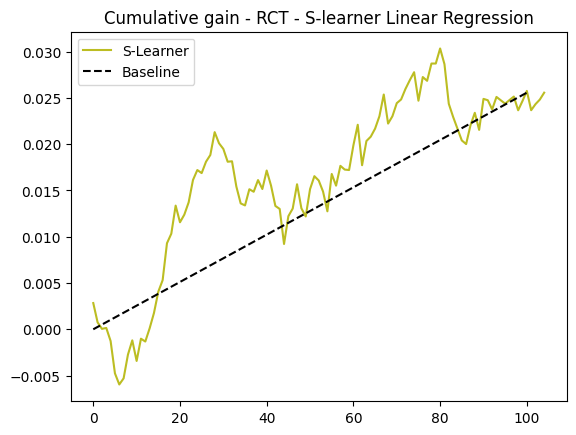

{'RCT - s_learner_lr': [{'qini_auc': 0.007349913270626489, 'uplift_auc': 0.010309911215331096}]}


In [100]:
data = pd.read_csv('../data/rct/s_learner_lr_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'S-Learner'
model_name = 'S-learner Linear Regression'
model_filename = 's_learner_lr'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# T-Learner with Gradient Boosting


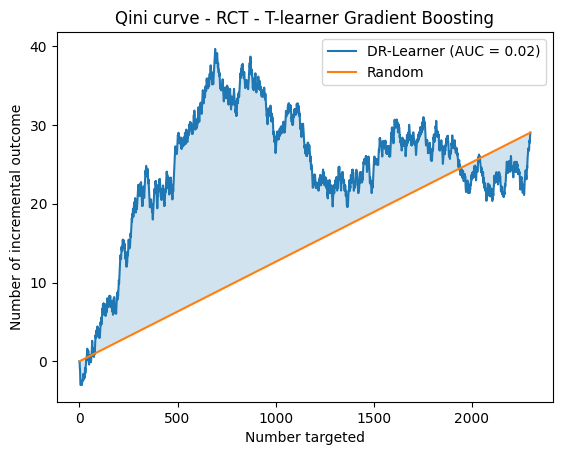

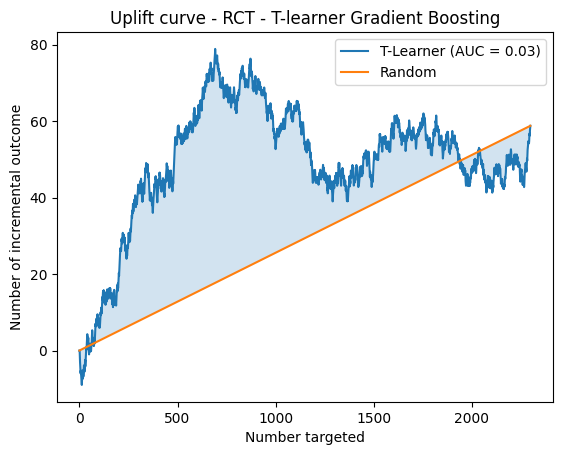

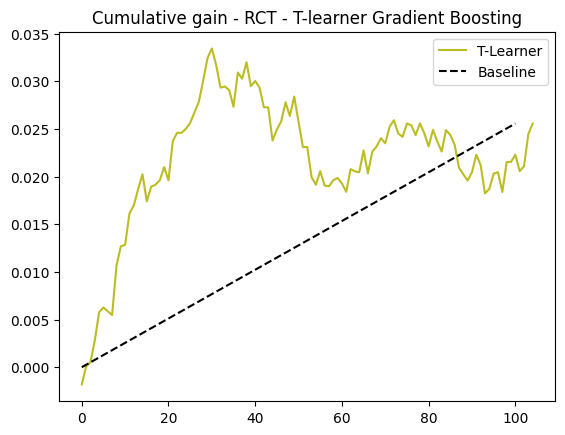

{'RCT - t_learner_gb': [{'qini_auc': 0.019314196081779648, 'uplift_auc': 0.031614650752962624}]}


In [101]:
data = pd.read_csv('../data/rct/t_learner_gb_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'T-Learner'
model_name = 'T-learner Gradient Boosting'
model_filename = 't_learner_gb'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# T-Learner with Linear Regression


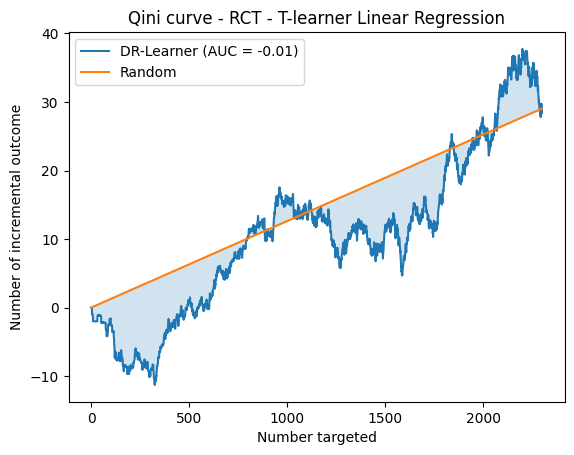

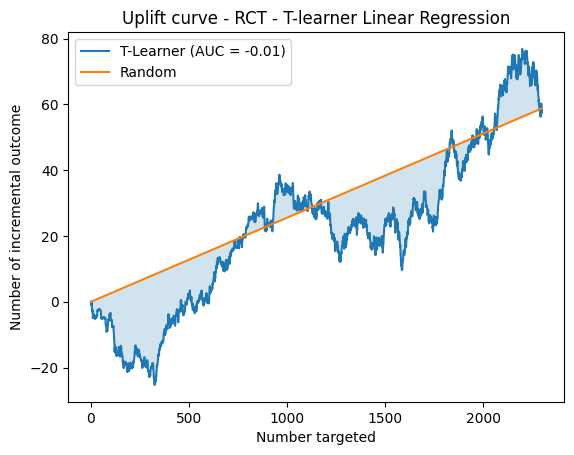

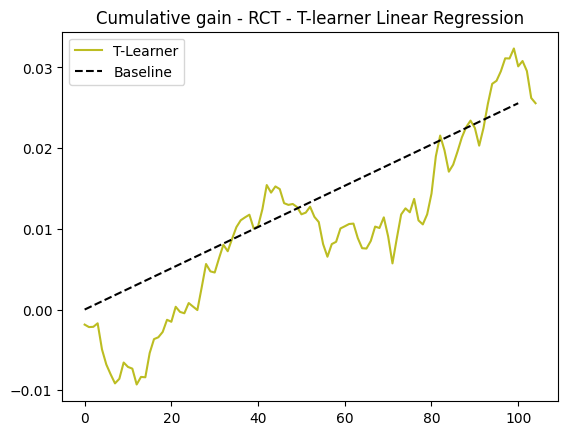

{'RCT - t_learner_lr': [{'qini_auc': -0.007351284799364327, 'uplift_auc': -0.011588797070094855}]}


In [102]:
data = pd.read_csv('../data/rct/t_learner_lr_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'T-Learner'
model_name = 'T-learner Linear Regression'
model_filename = 't_learner_lr'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# DR-Learner with SVM Propensity and XGBoost Response with XGBoost Regressor Final


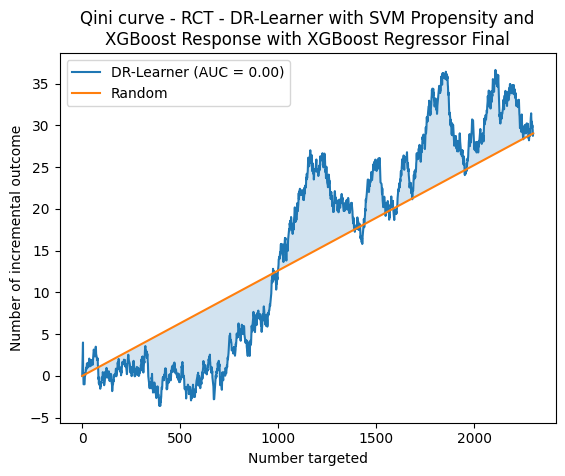

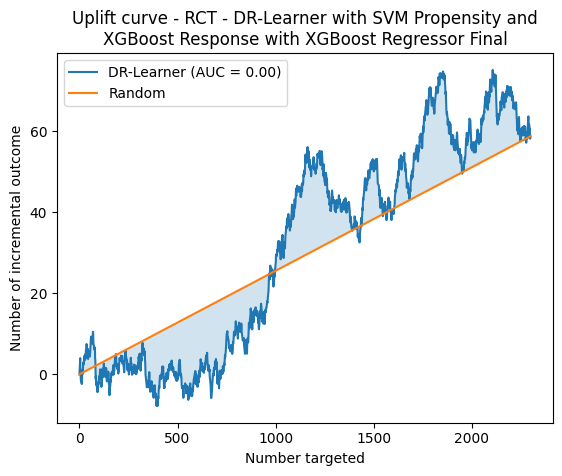

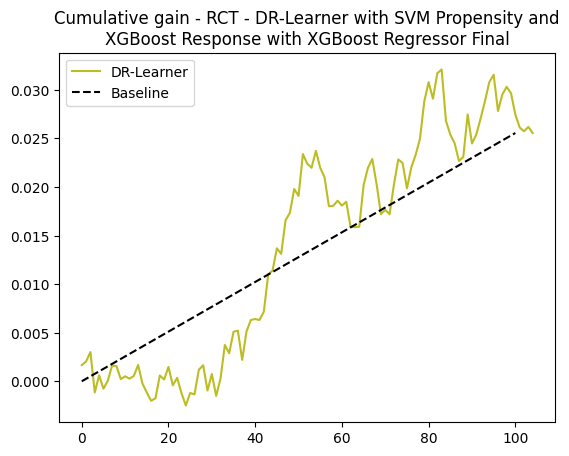

{'RCT - dr_learner_svm_xgb_xgb': [{'qini_auc': 0.0015029037021780422, 'uplift_auc': 0.0033587615856904736}]}


In [103]:
data = pd.read_csv('../data/rct/dr_learner_svm_xgb_xgb_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

general_model = 'DR-Learner'
model_name = 'DR-Learner with SVM Propensity and\nXGBoost Response with XGBoost Regressor Final'
model_filename = 'dr_learner_svm_xgb_xgb'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# DR-Learner with SVM Propensity and Logistic Regression Response with XGBoost Regressor Final


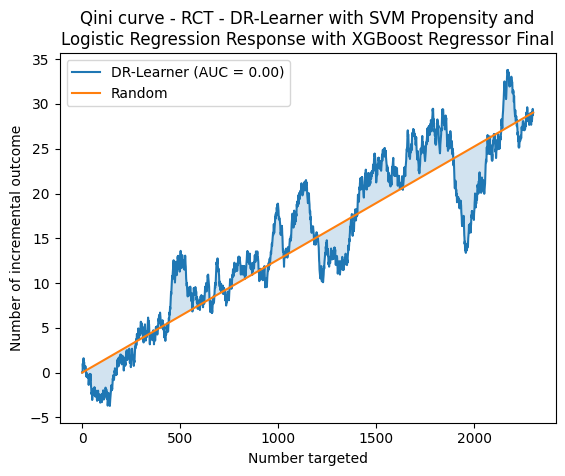

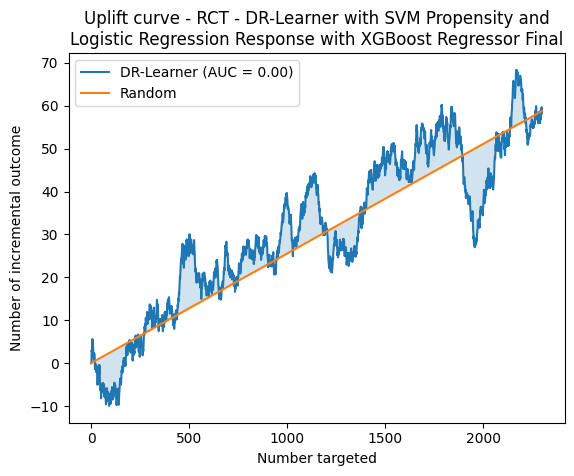

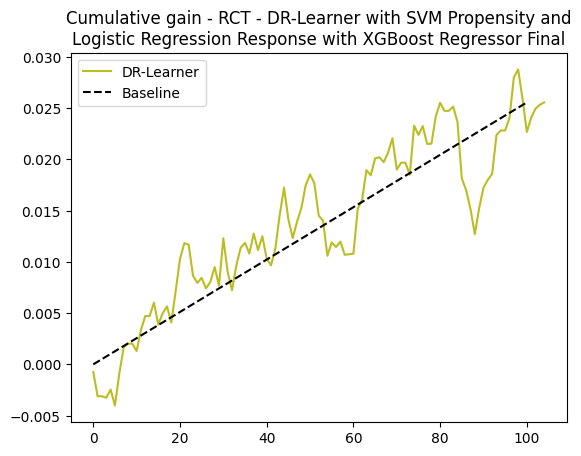

{'RCT - dr_learner_svm_logreg_xgb': [{'qini_auc': 0.0008682820573157472, 'uplift_auc': 0.0027520357898564995}]}


In [104]:
data = pd.read_csv('../data/rct/dr_learner_svm_logreg_xgb_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'DR-Learner'
model_name = 'DR-Learner with SVM Propensity and\nLogistic Regression Response with XGBoost Regressor Final'
model_filename = 'dr_learner_svm_logreg_xgb'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# DR-Learner with SVM Propensity and Gradient Boosting Response with XGBoost Regressor Final


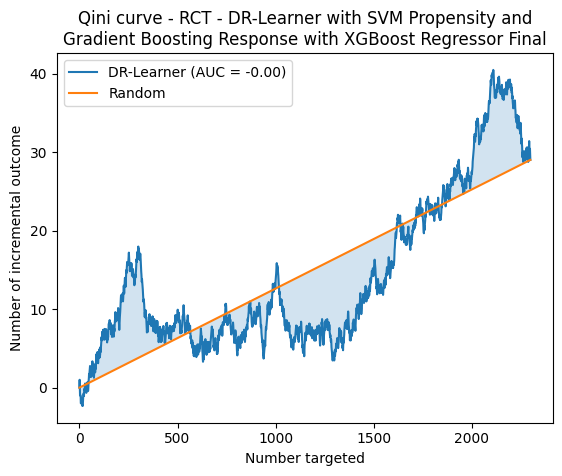

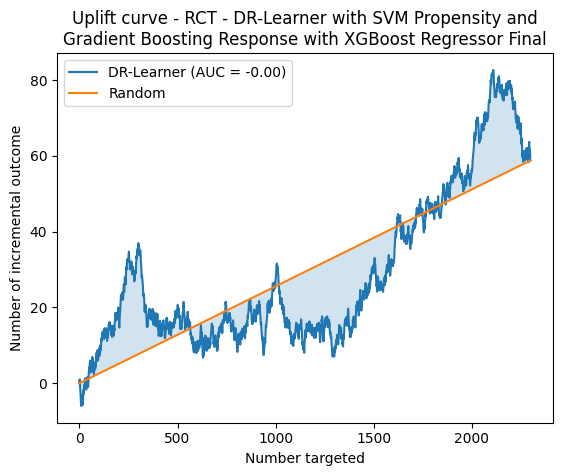

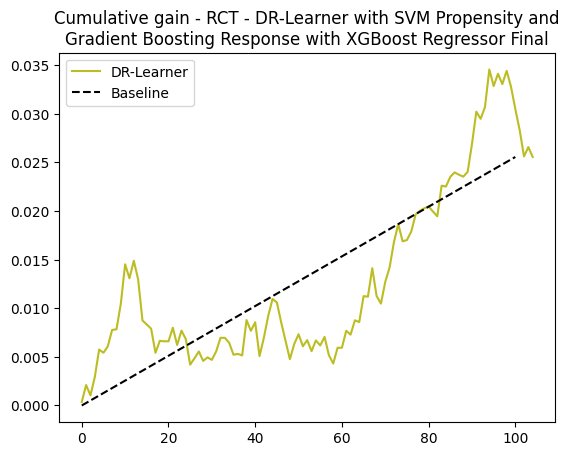

{'RCT - dr_learner_svm_gb_xgb': [{'qini_auc': -0.0005028865964090942, 'uplift_auc': -0.0006922456578750295}]}


In [105]:
data = pd.read_csv('../data/rct/dr_learner_svm_gb_xgb_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'DR-Learner'
model_name = 'DR-Learner with SVM Propensity and\nGradient Boosting Response with XGBoost Regressor Final'
model_filename = 'dr_learner_svm_gb_xgb'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# DR-Learner with Logistic Regression Propensity and Logistic Regression Response with Linear Regression Final


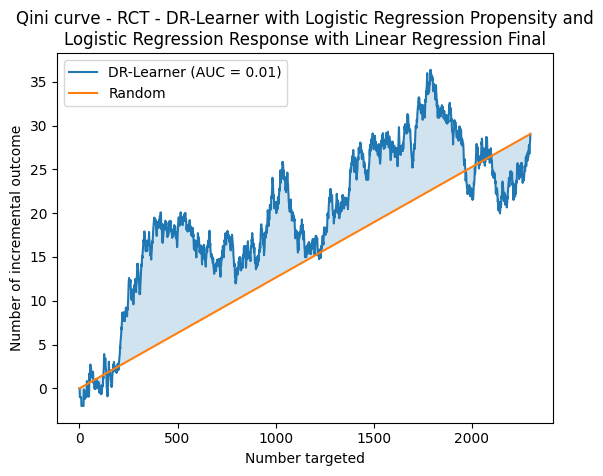

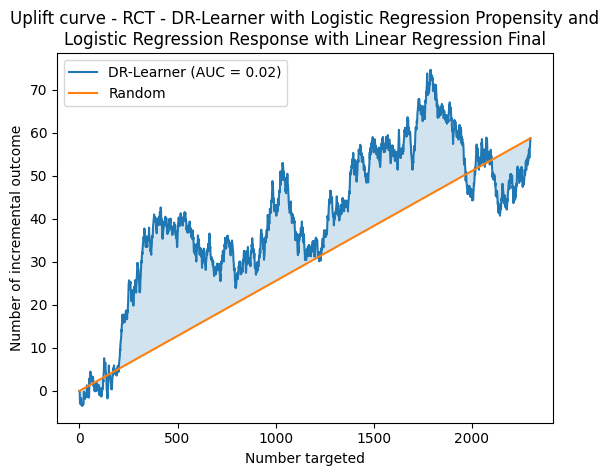

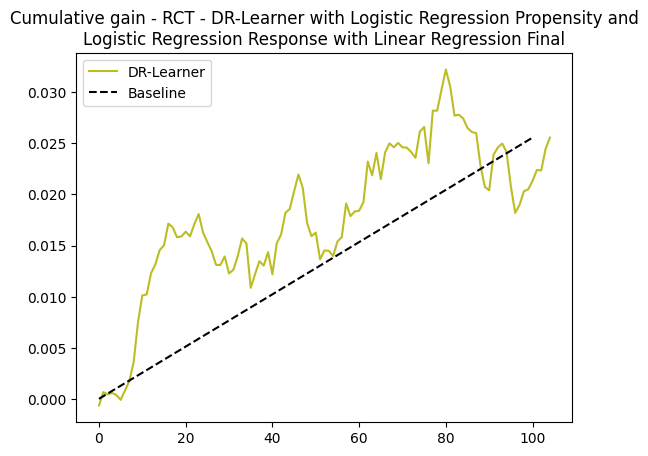

{'RCT - dr_learner_logreg_logreg_linear': [{'qini_auc': 0.009917671408726512, 'uplift_auc': 0.01739399800123794}]}


In [106]:
data = pd.read_csv('../data/rct/dr_learner_logreg_logreg_linear_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'DR-Learner'
model_name = 'DR-Learner with Logistic Regression Propensity and\nLogistic Regression Response with Linear Regression Final'
model_filename = 'dr_learner_logreg_logreg_linear'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# DR-Learner with Gradient Boosting Propensity and Gradient Boosting Response with Gradient Boosting Final


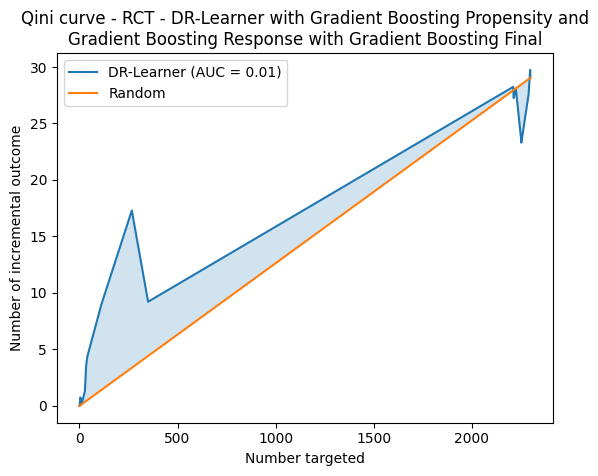

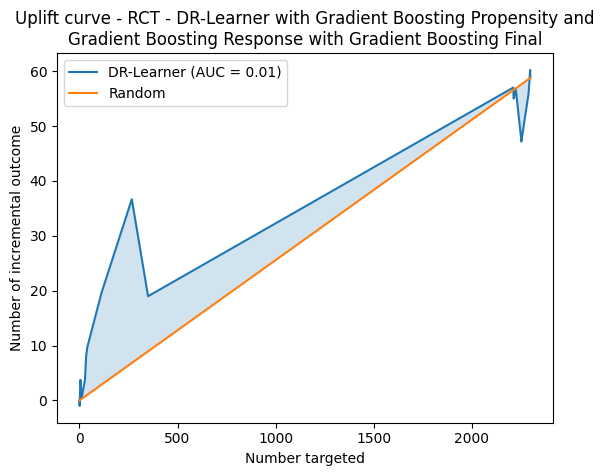

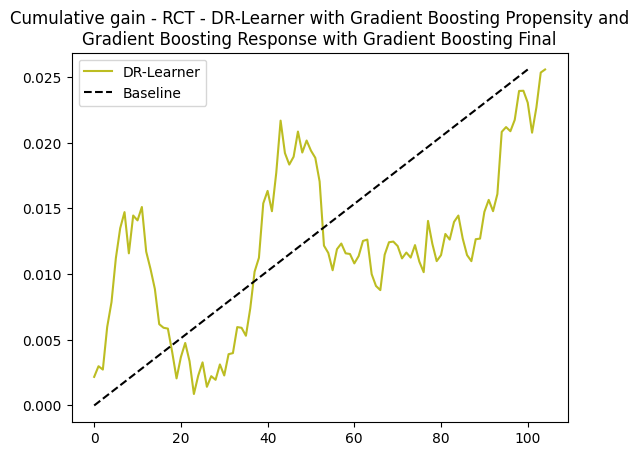

{'RCT - dr_learner_gb_gb_gb': [{'qini_auc': 0.006206688282740603, 'uplift_auc': 0.010877000102794495}]}


In [107]:
data = pd.read_csv('../data/rct/dr_learner_gb_gb_gb_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'DR-Learner'
model_name = 'DR-Learner with Gradient Boosting Propensity and\nGradient Boosting Response with Gradient Boosting Final'
model_filename = 'dr_learner_gb_gb_gb'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


# DR-Learner with K-Nearest Neighbors Propensity and Gradient Boosting Response with Gradient Boosting Final


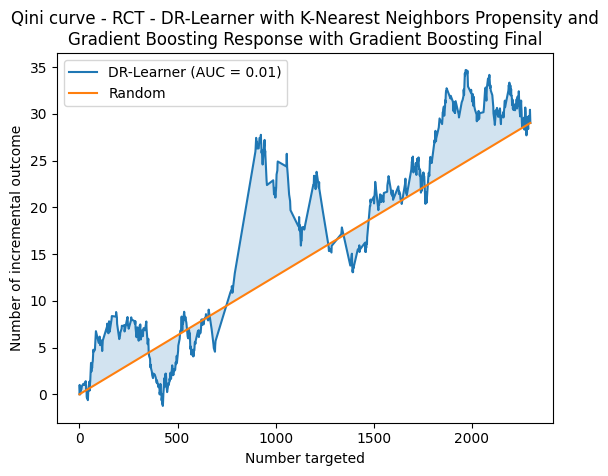

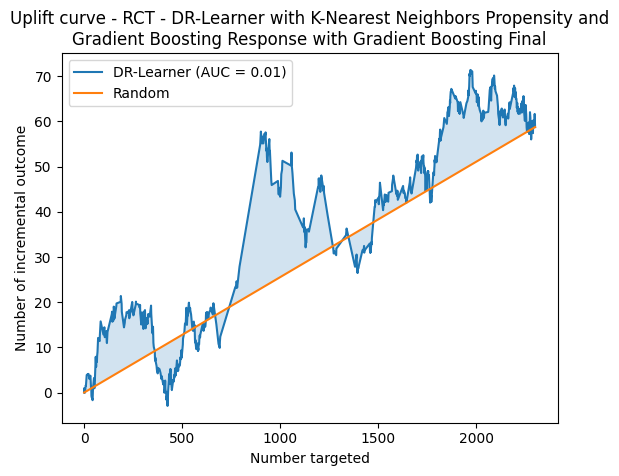

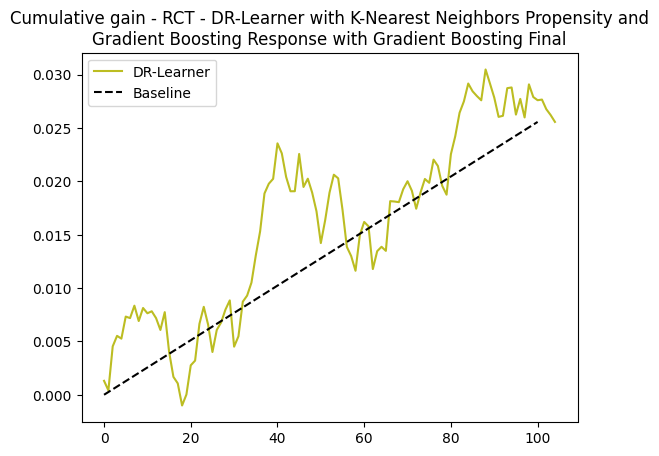

{'RCT - dr_learner_knn_gb_gb': [{'qini_auc': 0.005886103525716836, 'uplift_auc': 0.011529391456178277}]}


In [108]:
data = pd.read_csv('../data/rct/dr_learner_knn_gb_gb_model.csv')

data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28'], axis = 1)

treatment_column = 'peep_regime'
outcome_column = 'survival'
cate_column = 'cate'

general_model = 'DR-Learner'
model_name = 'DR-Learner with K-Nearest Neighbors Propensity and\nGradient Boosting Response with Gradient Boosting Final'
model_filename = 'dr_learner_knn_gb_gb'

results = eval(model_name, model_filename, general_model, data)
print(results)
all_results['RCT results'].append(results)


In [110]:
print(all_results)
for i in all_results['RCT results']:
    print(i)

{'RCT results': [{'RCT - s_learner_gb': [{'qini_auc': 0.005332116699522888, 'uplift_auc': 0.007316204411225892}]}, {'RCT - s_learner_lr': [{'qini_auc': 0.007349913270626489, 'uplift_auc': 0.010309911215331096}]}, {'RCT - t_learner_gb': [{'qini_auc': 0.019314196081779648, 'uplift_auc': 0.031614650752962624}]}, {'RCT - t_learner_lr': [{'qini_auc': -0.007351284799364327, 'uplift_auc': -0.011588797070094855}]}, {'RCT - dr_learner_svm_xgb_xgb': [{'qini_auc': 0.0015029037021780422, 'uplift_auc': 0.0033587615856904736}]}, {'RCT - dr_learner_svm_logreg_xgb': [{'qini_auc': 0.0008682820573157472, 'uplift_auc': 0.0027520357898564995}]}, {'RCT - dr_learner_svm_gb_xgb': [{'qini_auc': -0.0005028865964090942, 'uplift_auc': -0.0006922456578750295}]}, {'RCT - dr_learner_logreg_logreg_linear': [{'qini_auc': 0.009917671408726512, 'uplift_auc': 0.01739399800123794}]}, {'RCT - dr_learner_gb_gb_gb': [{'qini_auc': 0.006206688282740603, 'uplift_auc': 0.010877000102794495}]}, {'RCT - dr_learner_knn_gb_gb': [{'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.validation import check_consistent_length
from sklearn.utils import check_matplotlib_support

from sklift.utils import check_is_binary
from sklift.metrics import (
    uplift_curve, perfect_uplift_curve, uplift_auc_score,
    qini_curve, perfect_qini_curve, qini_auc_score,
    treatment_balance_curve, uplift_by_percentile
)

In [3]:
class UpliftCurveDisplay:
    """Qini and Uplift curve visualization.

    Args:
        x_actual, y_actual (array (shape = [>2]), array (shape = [>2])): Points on a curve
        x_baseline, y_baseline (array (shape = [>2]), array (shape = [>2])): Points on a random curve
        x_perfect, y_perfect (array (shape = [>2]), array (shape = [>2])): Points on a perfect curve
        random (bool): Plotting a random curve
        perfect (bool): Plotting a perfect curve
        estimator_name (str): Name of estimator. If None, the estimator name is not shown.
    """

    def __init__(self, x_actual, y_actual, x_baseline=None,
                 y_baseline=None, x_perfect=None, y_perfect=None,
                 random=None, perfect=None, estimator_name=None):
        self.x_actual = x_actual
        self.y_actual = y_actual
        self.x_baseline = x_baseline
        self.y_baseline = y_baseline
        self.x_perfect = x_perfect
        self.y_perfect = y_perfect
        self.random = random
        self.perfect = perfect
        self.estimator_name = estimator_name

    def plot(self, auc_score, ax=None, name=None, title=None, **kwargs):
        """Plot visualization

        Args:
            auc_score (float): Area under curve.§
            ax (matplotlib axes): Axes object to plot on. If `None`, a new figure and axes is created. Default is None.
            name (str): Name of ROC Curve for labeling. If `None`, use the name of the estimator. Default is None.
            title (str): Title plot. Default is None.

        Returns:
            Object that stores computed values
        """
        check_matplotlib_support('UpliftCurveDisplay.plot')

        name = self.estimator_name if name is None else name

        line_kwargs = {}
        if auc_score is not None and name is not None:
            line_kwargs["label"] = f"{name} ({title} = {auc_score:0.2f})"
        elif auc_score is not None:
            line_kwargs["label"] = f"{title} = {auc_score:0.2f}"
        elif name is not None:
            line_kwargs["label"] = name

        line_kwargs.update(**kwargs)

        if ax is None:
            fig, ax = plt.subplots()

        self.line_, = ax.plot(self.x_actual, self.y_actual, **line_kwargs)

        if self.random:
            ax.plot(self.x_baseline, self.y_baseline, label="Random")
            ax.fill_between(self.x_actual, self.y_actual, self.y_baseline, alpha=0.2)

        if self.perfect:
            ax.plot(self.x_perfect, self.y_perfect, label="Perfect")

        ax.set_xlabel('Number targeted')
        ax.set_ylabel('Number of incremental outcome')

        if self.random == self.perfect:
            variance = False
        else:
            variance = True

        if len(ax.lines) > 4:
            ax.lines.pop(len(ax.lines) - 1)
            if variance == False:
                ax.lines.pop(len(ax.lines) - 1)

        if "label" in line_kwargs:
            ax.legend(loc=u'upper left', bbox_to_anchor=(1, 1))

        self.ax_ = ax
        self.figure_ = ax.figure

        return self

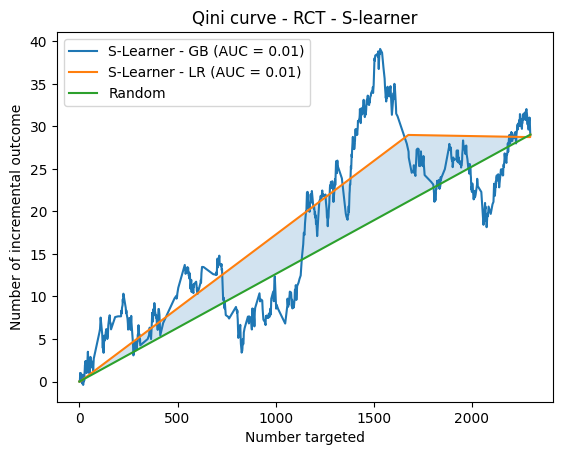

In [23]:
# Modified plot_qini_curve function
def plot_qini_curve(y_true, uplift, treatment,
                    random=True, perfect=True, negative_effect=True, ax=None, name=None, **kwargs):
    """Plot Qini curves from predictions.

    Args:
        y_true (1d array-like): Ground truth (correct) binary labels.
        uplift (1d array-like): Predicted uplift, as returned by a model.
        treatment (1d array-like): Treatment labels.
        random (bool): Draw a random curve. Default is True.
        perfect (bool): Draw a perfect curve. Default is True.
        negative_effect (bool): If True, optimum Qini Curve contains the negative effects
            (negative uplift because of campaign). Otherwise, optimum Qini Curve will not
            contain the negative effects. Default is True.
        ax (object): The graph on which the function will be built. Default is None.
        name (string): The name of the function. Default is None.

    Returns:
        Object that stores computed values.
    """
    y_true, uplift, treatment = np.array(y_true), np.array(uplift), np.array(treatment)
    x_actual, y_actual = qini_curve(y_true, uplift, treatment)

    if random:
        x_baseline, y_baseline = x_actual, x_actual * y_actual[-1] / len(y_true)
    else:
        x_baseline, y_baseline = None, None

    if perfect:
        x_perfect, y_perfect = perfect_qini_curve(
            y_true, treatment, negative_effect)
    else:
        x_perfect, y_perfect = None, None

    viz = UpliftCurveDisplay(
        x_actual=x_actual,
        y_actual=y_actual,
        x_baseline=x_baseline,
        y_baseline=y_baseline,
        x_perfect=x_perfect,
        y_perfect=y_perfect,
        random=random,
        perfect=perfect,
        estimator_name=name,
    )

    auc = qini_auc_score(y_true, uplift, treatment, negative_effect)

    return viz.plot(auc, ax=ax, title="AUC", **kwargs)


data = pd.read_csv('../data/rct/s_learner_gb_model.csv')
data['survival'] = 1 - data['mort_28']
data = data.drop(['mort_28', 'cate'], axis = 1)

data_s_gb = pd.read_csv('../data/rct/s_learner_gb_model.csv')
data['s_gb'] = data_s_gb['cate']

data_s_lr = pd.read_csv('../data/rct/s_learner_lr_model.csv')
data['s_lr'] = data_s_lr['cate']

data_t_gb = pd.read_csv('../data/rct/t_learner_gb_model.csv')
data['t_gb'] = data_t_gb['cate']

data_t_lr = pd.read_csv('../data/rct/t_learner_lr_model.csv')
data['t_lr'] = data_t_lr['cate']

data_dr_svm_xgb_xgb = pd.read_csv('../data/rct/dr_learner_svm_xgb_xgb_model.csv')
data['dr_svm_xgb_xgb'] = data_dr_svm_xgb_xgb['cate']

data_dr_svm_logreg_xgb = pd.read_csv('../data/rct/dr_learner_svm_logreg_xgb_model.csv')
data['dr_svm_logreg_xgb'] = data_dr_svm_logreg_xgb['cate']

data_dr_svm_gb_xgb = pd.read_csv('../data/rct/dr_learner_svm_gb_xgb_model.csv')
data['dr_svm_gb_xgb'] = data_dr_svm_gb_xgb['cate']

data_dr_logreg_logreg_linear = pd.read_csv('../data/rct/dr_learner_logreg_logreg_linear_model.csv')
data['dr_logreg_logreg_linear'] = data_dr_logreg_logreg_linear['cate']

data_dr_gb_gb_gb = pd.read_csv('../data/rct/dr_learner_gb_gb_gb_model.csv')
data['dr_gb_gb_gb'] = data_dr_gb_gb_gb['cate']

data_dr_knn_gb_gb = pd.read_csv('../data/rct/dr_learner_knn_gb_gb_model.csv')
data['dr_knn_gb_gb'] = data_dr_knn_gb_gb['cate']

treatment_column = 'peep_regime'
outcome_column = 'survival'

# # Visualize Qini Curve - RCT
# fig, ax = plt.subplots(1, 1)
# ax.set_title(f'Qini curve - RCT - All models')
# plot_qini_curve(data[outcome_column], data['s_gb'], data[treatment_column], perfect=False, name='S-Learner', ax=ax, random=True)
# plot_qini_curve(data[outcome_column], data['s_lr'], data[treatment_column], perfect=False, name='Ss-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['t_gb'], data[treatment_column], perfect=False, name='T-Learner', ax=ax, random=False)
# # plot_qini_curve(data[outcome_column], data['t_lr'], data[treatment_column], perfect=False, name='Tt-Learner', ax=ax, random=False)
# # plot_qini_curve(data[outcome_column], data['dr_svm_xgb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# # plot_qini_curve(data[outcome_column], data['dr_svm_logreg_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# # plot_qini_curve(data[outcome_column], data['dr_svm_gb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# # plot_qini_curve(data[outcome_column], data['dr_logreg_logreg_linear'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# # plot_qini_curve(data[outcome_column], data['dr_gb_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# # plot_qini_curve(data[outcome_column], data['dr_knn_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plt.title(f"Qini curve - RCT - All models")
# plt.legend(loc='best')
# plt.savefig(f'plots/RCT/All-Models-Qini_curve_test.png', bbox_inches='tight')
# plt.savefig(f'plots/RCT/All-Models-Qini_curve_test.svg', bbox_inches='tight')
# plt.show()

# Visualize Qini Curve - RCT
fig, ax = plt.subplots(1, 1)
ax.set_title(f'Qini curve - RCT - S-learner')
plot_qini_curve(data[outcome_column], data['s_gb'], data[treatment_column], perfect=False, name='S-Learner - GB', ax=ax, random=False)
plot_qini_curve(data[outcome_column], data['s_lr'], data[treatment_column], perfect=False, name='S-Learner - LR', ax=ax, random=True)
# plot_qini_curve(data[outcome_column], data['t_gb'], data[treatment_column], perfect=False, name='T-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['t_lr'], data[treatment_column], perfect=False, name='Tt-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_svm_xgb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_svm_logreg_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_svm_gb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_logreg_logreg_linear'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_gb_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_knn_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
plt.title(f"Qini curve - RCT - S-learner")
plt.legend(loc='best')
plt.savefig(f'plots/RCT/S-Qini_curve_test.png', bbox_inches='tight')
plt.savefig(f'plots/RCT/S-Qini_curve_test.svg', bbox_inches='tight')
plt.show()


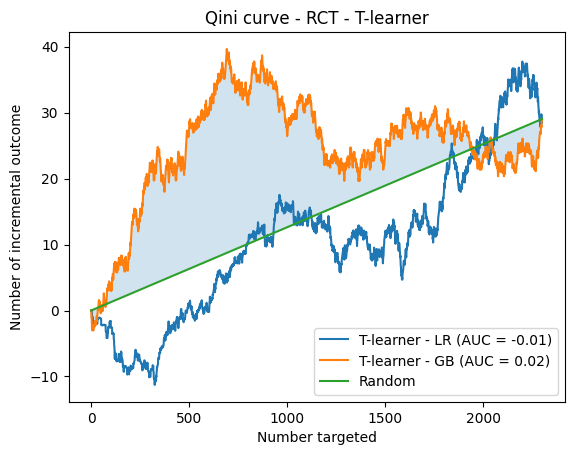

In [24]:
# Visualize Qini Curve - RCT
fig, ax = plt.subplots(1, 1)
ax.set_title(f'Qini curve - RCT - T-learner')
# plot_qini_curve(data[outcome_column], data['s_gb'], data[treatment_column], perfect=False, name='S-Learner - GB', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['s_lr'], data[treatment_column], perfect=False, name='S-Learner - LR', ax=ax, random=True)
plot_qini_curve(data[outcome_column], data['t_lr'], data[treatment_column], perfect=False, name='T-learner - LR', ax=ax, random=False)
plot_qini_curve(data[outcome_column], data['t_gb'], data[treatment_column], perfect=False, name='T-learner - GB', ax=ax, random=True)
# plot_qini_curve(data[outcome_column], data['dr_svm_xgb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_svm_logreg_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_svm_gb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_logreg_logreg_linear'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_gb_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_knn_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
plt.title(f"Qini curve - RCT - T-learner")
plt.legend(loc='best')
plt.savefig(f'plots/RCT/T-Qini_curve_test.png', bbox_inches='tight')
plt.savefig(f'plots/RCT/T-Qini_curve_test.svg', bbox_inches='tight')
plt.show()

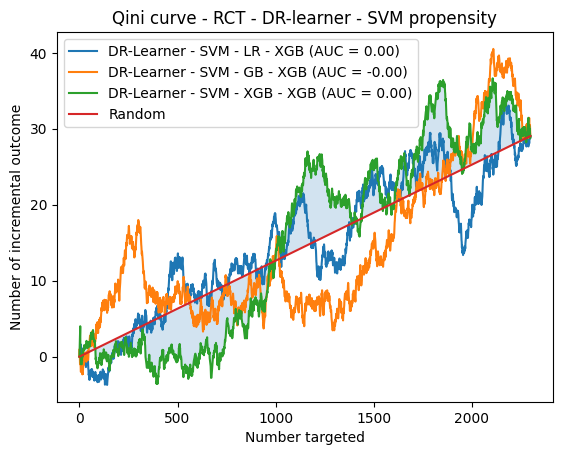

In [25]:
# Visualize Qini Curve - RCT
fig, ax = plt.subplots(1, 1)
ax.set_title(f'Qini curve - RCT - DR-learner - SVM propensity')
# plot_qini_curve(data[outcome_column], data['s_gb'], data[treatment_column], perfect=False, name='S-Learner - GB', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['s_lr'], data[treatment_column], perfect=False, name='S-Learner - LR', ax=ax, random=True)
# plot_qini_curve(data[outcome_column], data['t_lr'], data[treatment_column], perfect=False, name='Tt-Learner - LR', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['t_gb'], data[treatment_column], perfect=False, name='T-Learner - GB', ax=ax, random=True)
plot_qini_curve(data[outcome_column], data['dr_svm_logreg_xgb'], data[treatment_column], perfect=False, name='DR-Learner - SVM - LR - XGB', ax=ax, random=False)
plot_qini_curve(data[outcome_column], data['dr_svm_gb_xgb'], data[treatment_column], perfect=False, name='DR-Learner - SVM - GB - XGB', ax=ax, random=False)
plot_qini_curve(data[outcome_column], data['dr_svm_xgb_xgb'], data[treatment_column], perfect=False, name='DR-Learner - SVM - XGB - XGB', ax=ax, random=True)
# plot_qini_curve(data[outcome_column], data['dr_logreg_logreg_linear'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_gb_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_knn_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
plt.title(f"Qini curve - RCT - DR-learner - SVM propensity")
plt.legend(loc='best')
plt.savefig(f'plots/RCT/DR-SVM-Qini_curve_test.png', bbox_inches='tight')
plt.savefig(f'plots/RCT/DR-SVM-Qini_curve_test.svg', bbox_inches='tight')
plt.show()

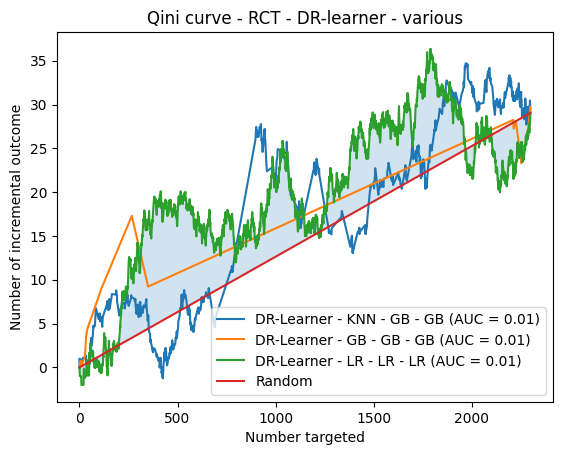

In [26]:
# Visualize Qini Curve - RCT
fig, ax = plt.subplots(1, 1)
ax.set_title(f'Qini curve - RCT - DR-learner - various')
# plot_qini_curve(data[outcome_column], data['s_gb'], data[treatment_column], perfect=False, name='S-Learner - GB', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['s_lr'], data[treatment_column], perfect=False, name='S-Learner - LR', ax=ax, random=True)
# plot_qini_curve(data[outcome_column], data['t_lr'], data[treatment_column], perfect=False, name='Tt-Learner - LR', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['t_gb'], data[treatment_column], perfect=False, name='T-Learner - GB', ax=ax, random=True)
# plot_qini_curve(data[outcome_column], data['dr_svm_xgb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_svm_logreg_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
# plot_qini_curve(data[outcome_column], data['dr_svm_gb_xgb'], data[treatment_column], perfect=False, name='DR-Learner', ax=ax, random=False)
plot_qini_curve(data[outcome_column], data['dr_knn_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner - KNN - GB - GB', ax=ax, random=False)
plot_qini_curve(data[outcome_column], data['dr_gb_gb_gb'], data[treatment_column], perfect=False, name='DR-Learner - GB - GB - GB', ax=ax, random=False)
plot_qini_curve(data[outcome_column], data['dr_logreg_logreg_linear'], data[treatment_column], perfect=False, name='DR-Learner - LR - LR - LR', ax=ax, random=True)
plt.title(f"Qini curve - RCT - DR-learner - various")
plt.legend(loc='best')
plt.savefig(f'plots/RCT/DR-Rest-Qini_curve_test.png', bbox_inches='tight')
plt.savefig(f'plots/RCT/DR-Rest-Qini_curve_test.svg', bbox_inches='tight')
plt.show()